<a href="https://colab.research.google.com/github/vnaren13/cs666student/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

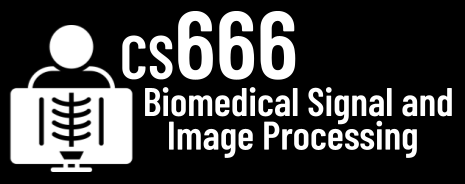
#Assignment 5

In [66]:
# NAME:VENKAT NAREN KOYA

In [67]:
# In this assignment, we will visualize and explore a CT scan!

In [68]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [69]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [70]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [71]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [72]:
# TODO: YOUR_ANSWER - 220

In [73]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [74]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

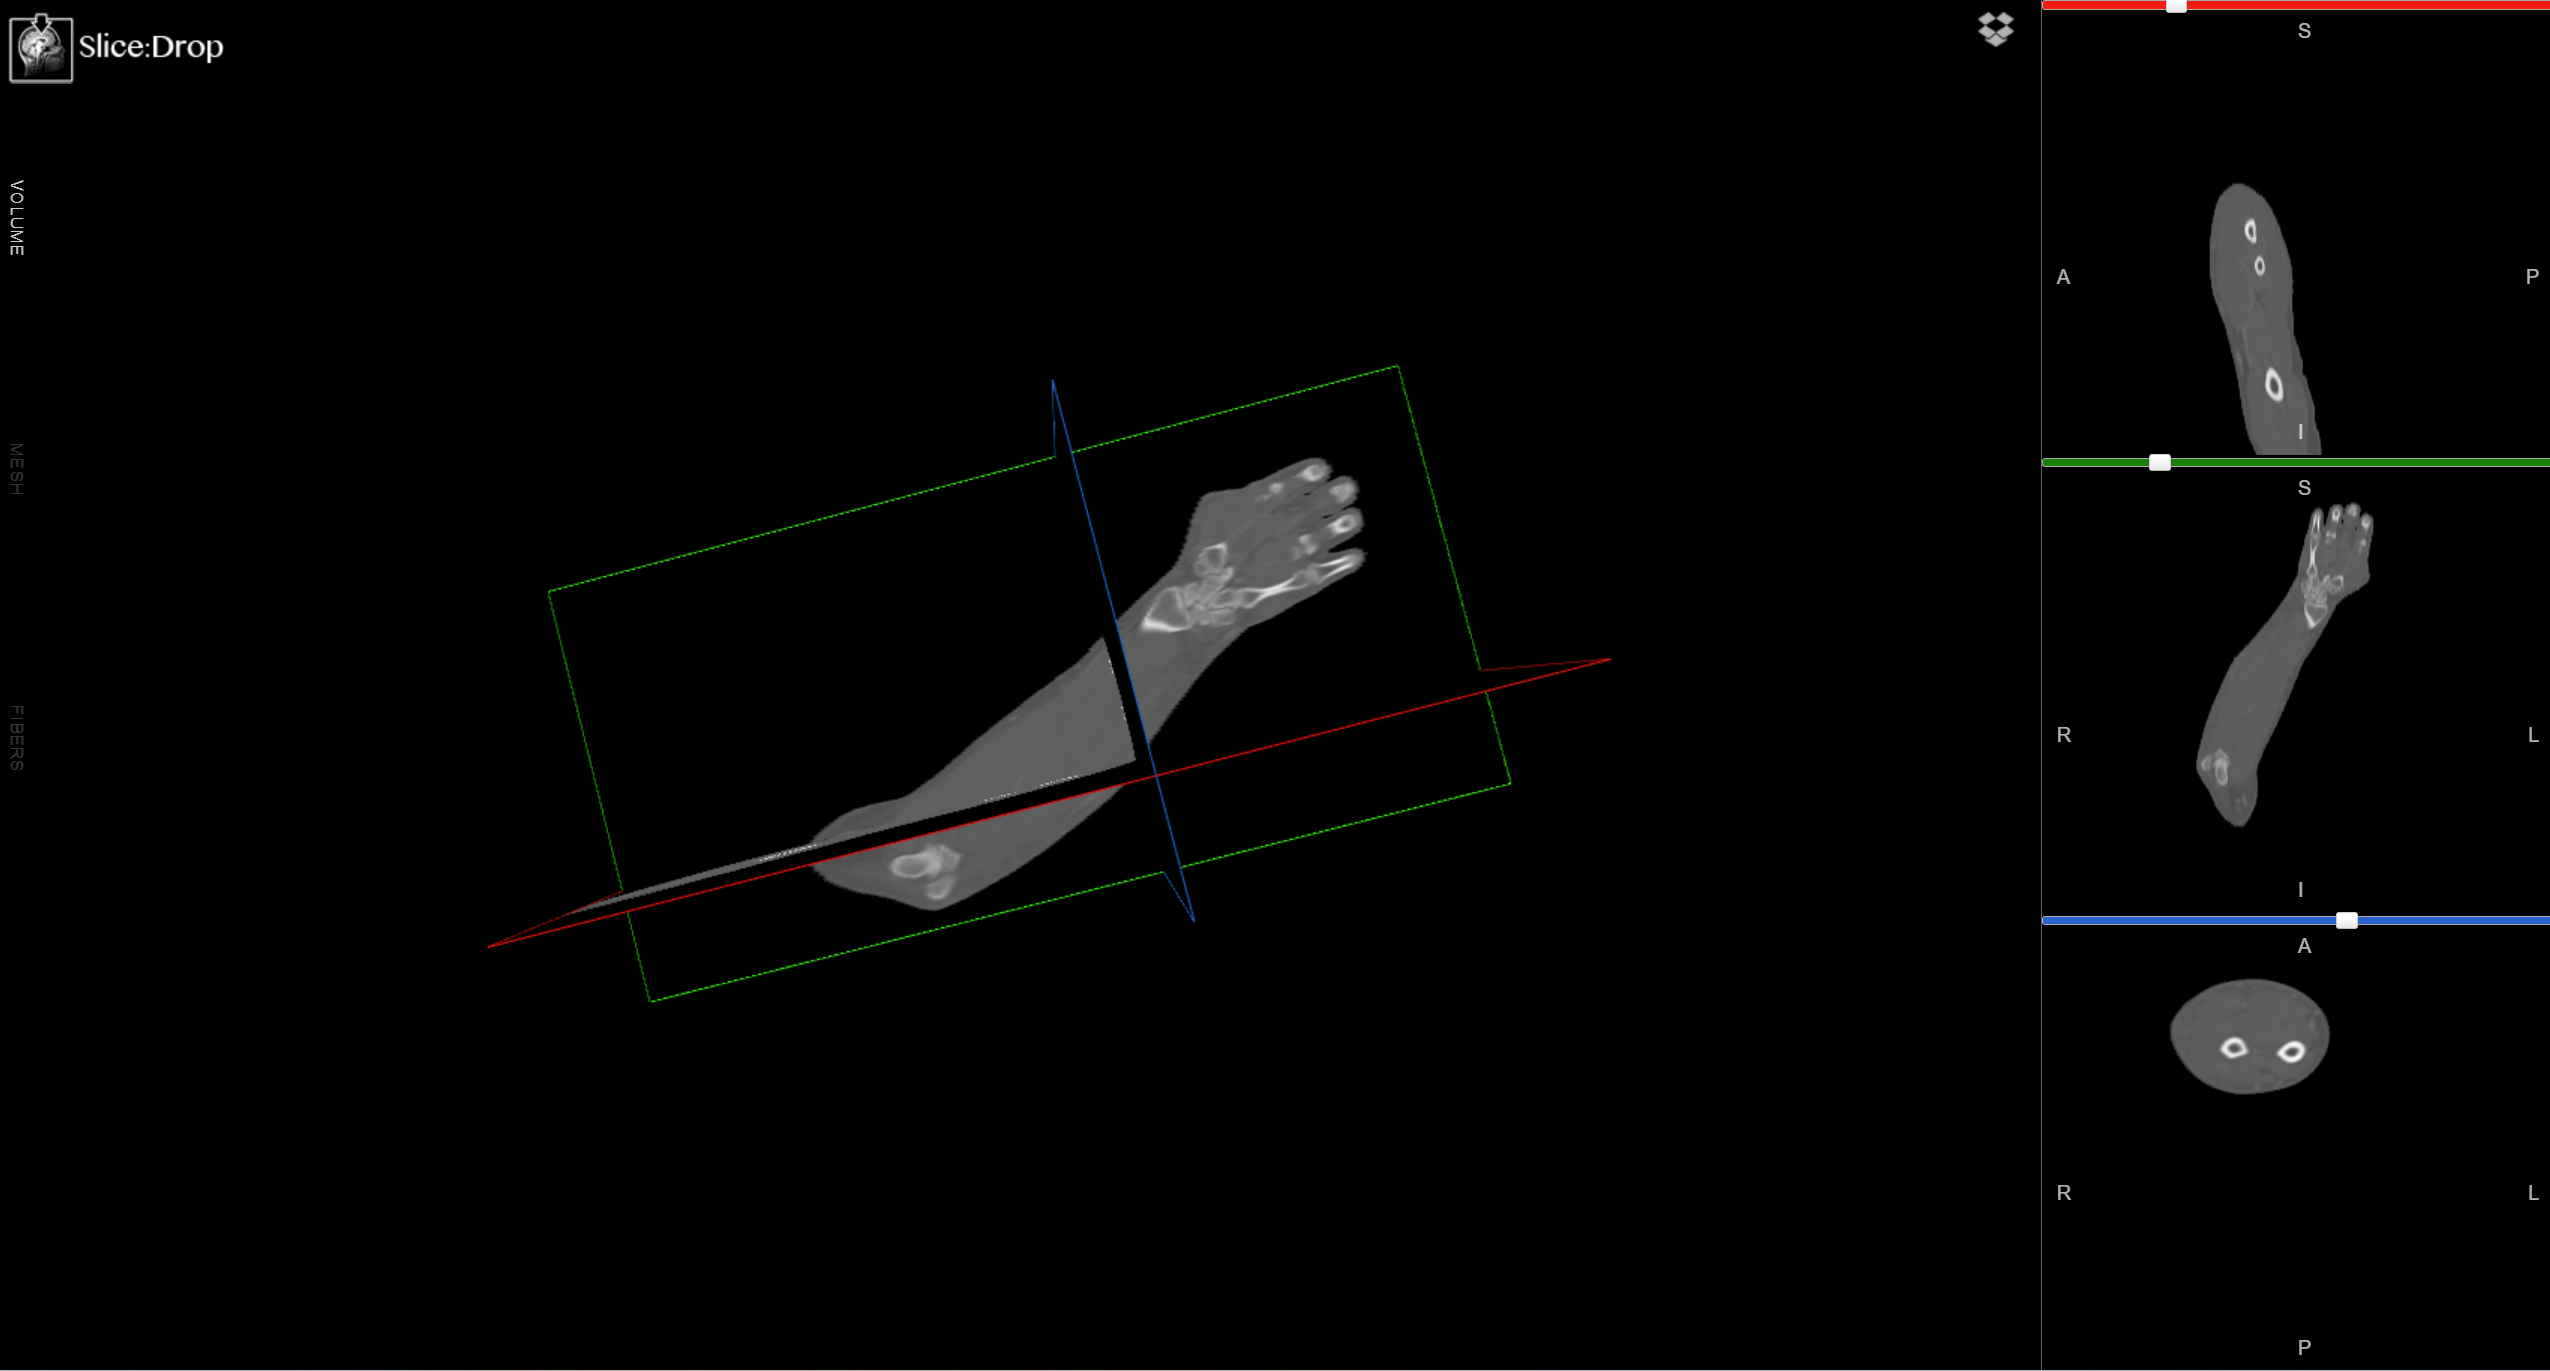

In [75]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [76]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

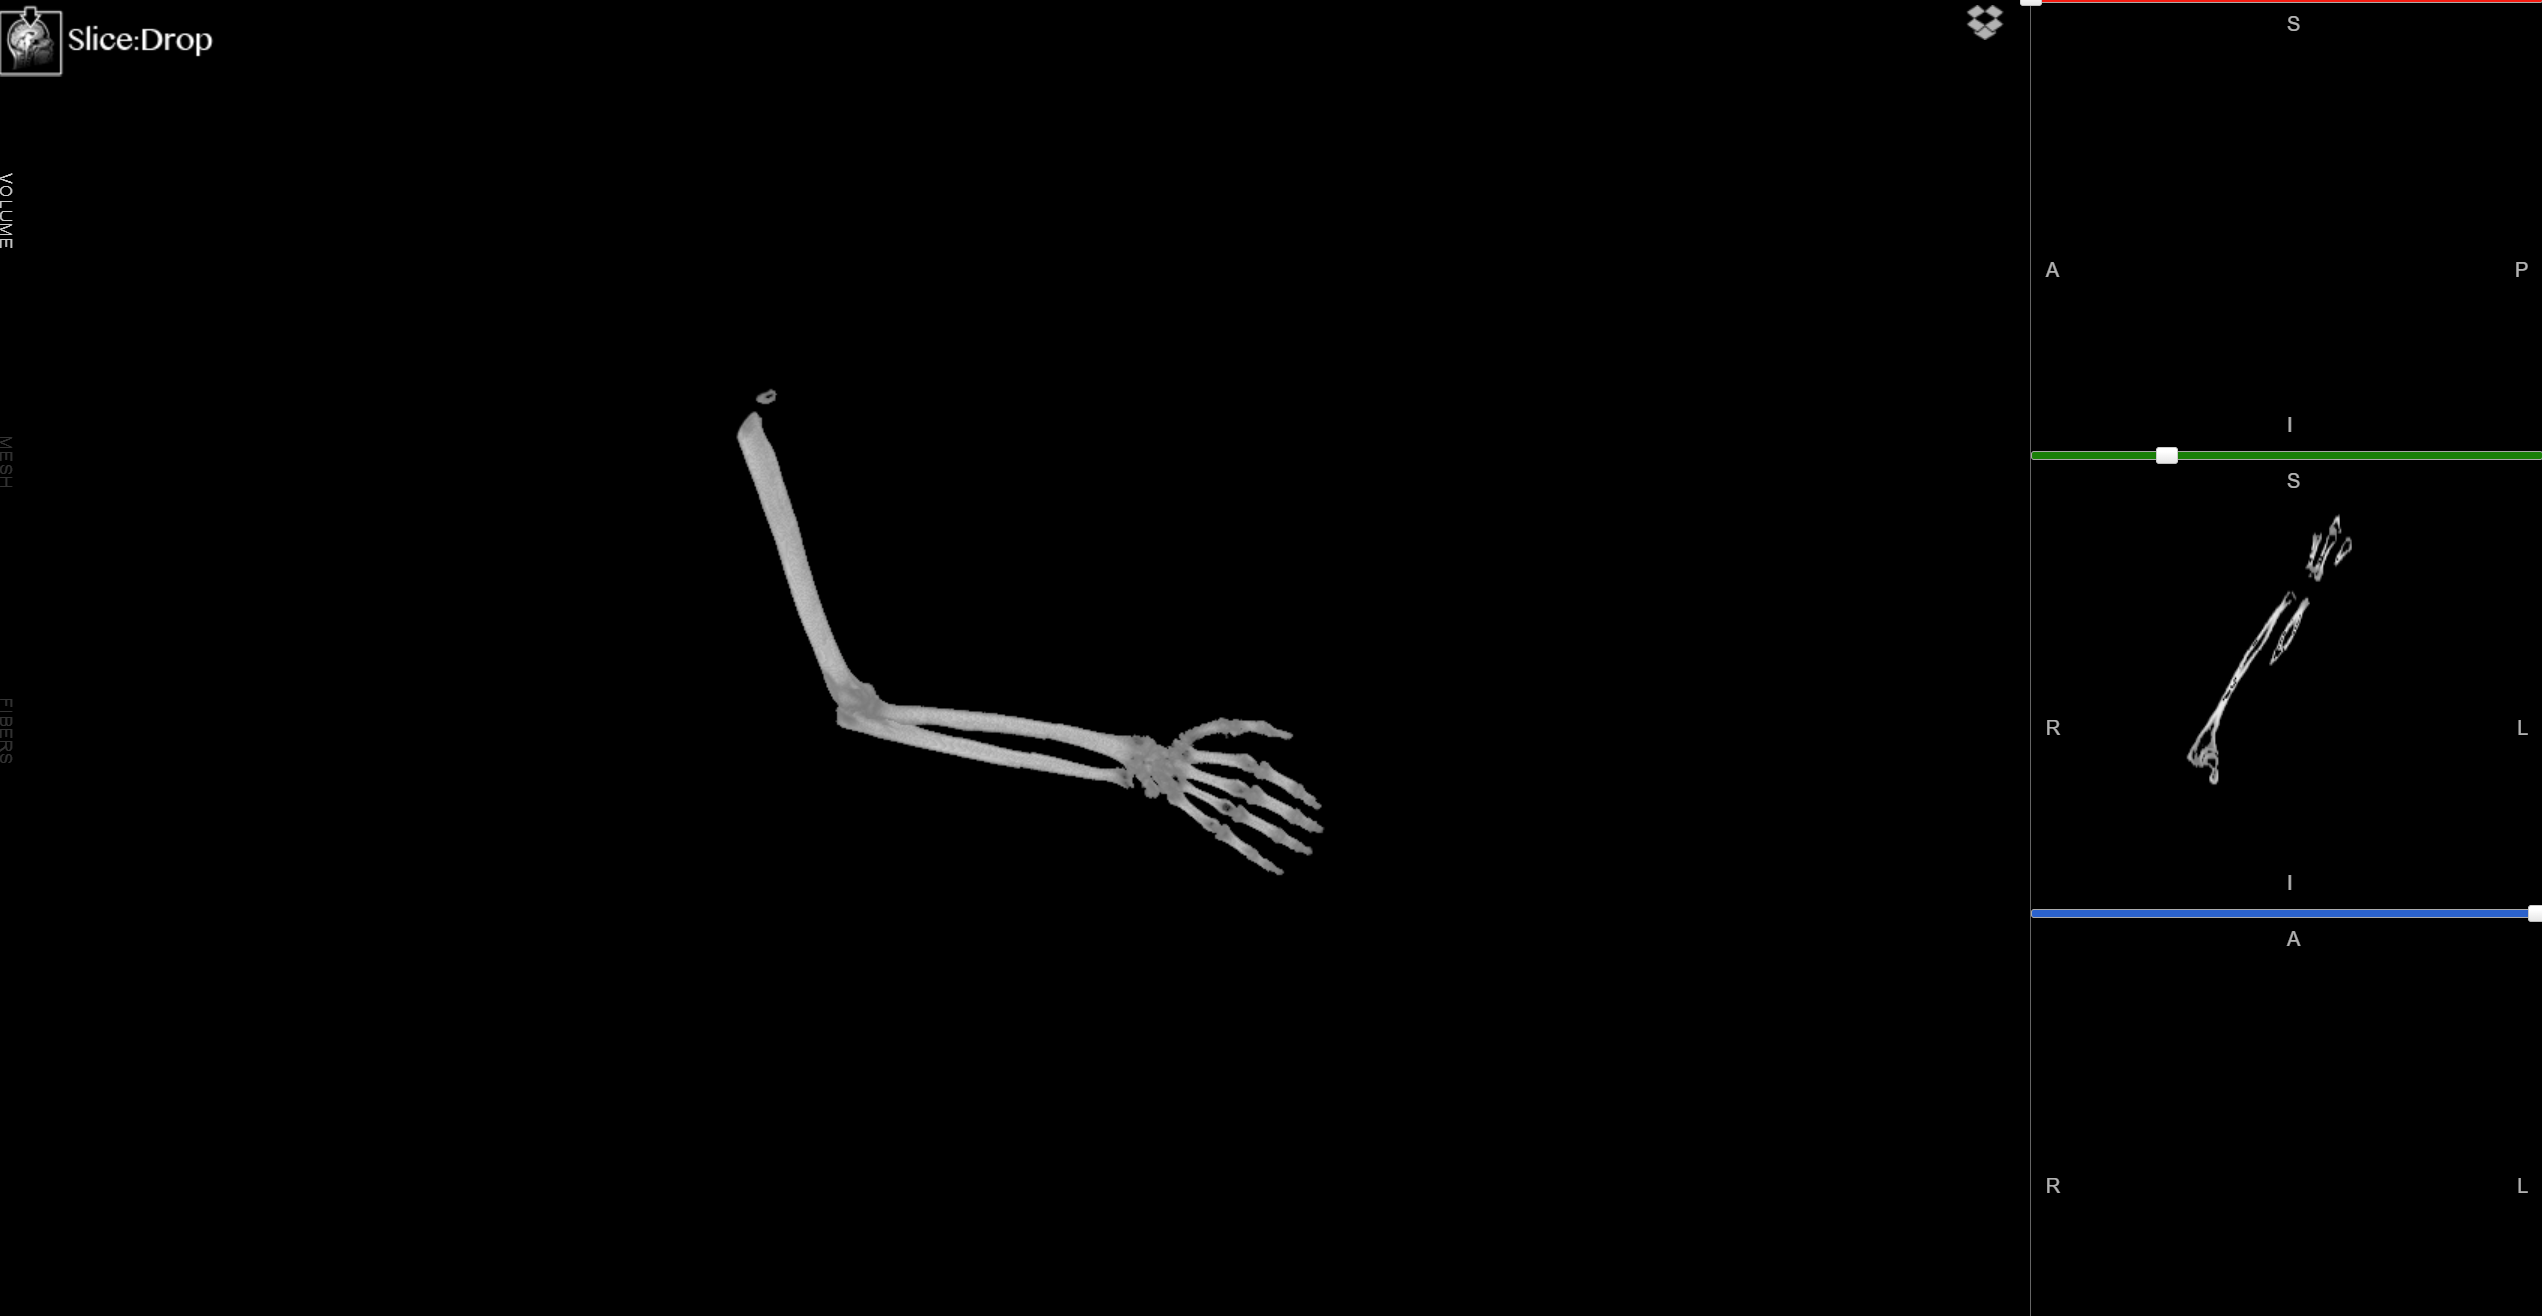

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [77]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [78]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [79]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [80]:
from pydicom import dcmread

In [81]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np
ct ='ct'
ct_files = os.listdir(ct)
ct_files.sort()

first_file = dcmread(os.path.join(ct, ct_files[0]))
size=[len(ct_files)]
dimensions = list(first_file.pixel_array.shape)

dim=dimensions+size
ct_numpy = np.zeros(dim, dtype=np.int32)
print(dim)
for i in range(len(ct_files)):
    file_name = ct_files[i]
    file_path = os.path.join(ct, file_name)
    dicom_file = dcmread(file_path)
    ct_numpy[:, :, i] = dicom_file.pixel_array




[454, 512, 220]


In [82]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.


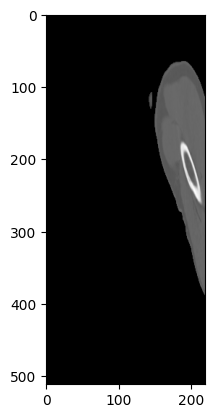

In [83]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt


axial = ct_numpy[219, :,:]
plt.imshow(axial, cmap='gray')
plt.show()

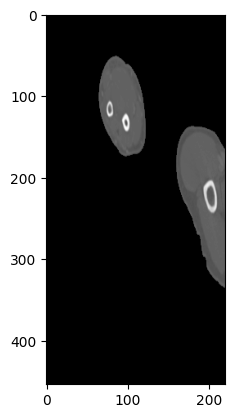

In [84]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal = ct_numpy[:, 220, :]
plt.imshow(sagittal, cmap='gray')
plt.show()

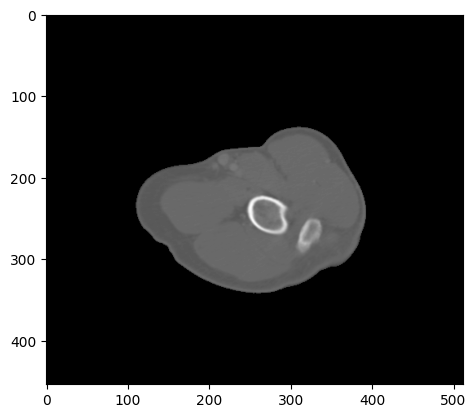

In [85]:
# TODO: YOUR CODE FOR CORONAL
coronal = ct_numpy[:,:, 219]
plt.imshow(coronal, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [86]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [87]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [88]:
# TODO: YOUR CODE
level = dicom_file.WindowCenter
width = dicom_file.WindowWidth
rescale = dicom_file['RescaleIntercept'].value

In [89]:
level

'30.0'

In [90]:
width

'410.0'

In [91]:
rescale

'-1024.0'

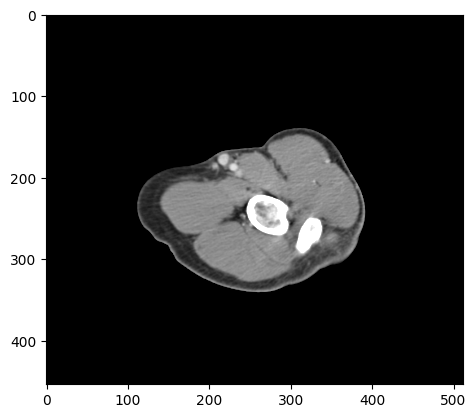

In [92]:
hu_pixels=dicom_file.pixel_array
vmin = level - width/2
vmax = level + width/2
plt.imshow( hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

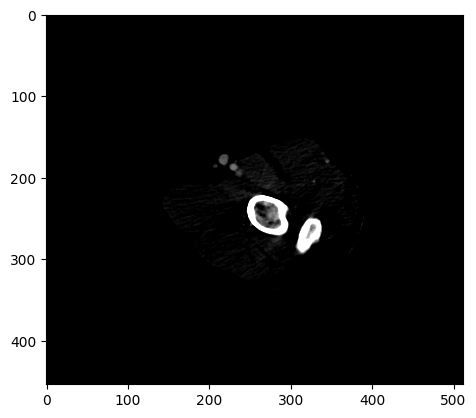

In [93]:
# 2) Play around with different Window/Level values that enhance
# the visualization.
level = 200
width= 300
vmin = level - width/2
vmax = level + width/2
plt.imshow( hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

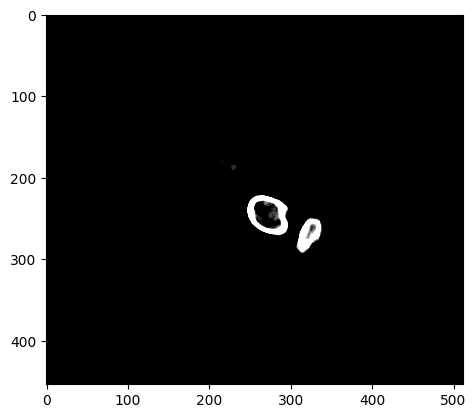

In [94]:
level = 250
width= 200
vmin = level - width/2
vmax = level + width/2
plt.imshow( hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [95]:
# TODO: YOUR CODE


In [96]:
# Which values make sense and why?


In [97]:
# TODO: YOUR ANSWER
# i feel the values will make sense depends on the type of segmentation the user wants to see.
# so it makes sense to choose values depending on the requirement. 

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [98]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

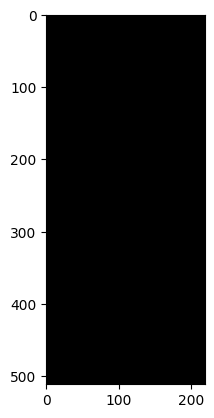

In [99]:
# TODO: YOUR CODE TO SEGMENT FAT
new_mask = ct_numpy[120].copy().astype(np.int16)
new_mask[(new_mask > -100)|(new_mask < -60)] = 0
plt.imshow(new_mask, cmap='gray')
plt.show()
     


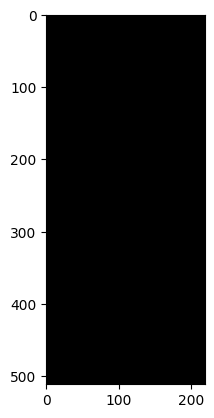

In [100]:

new_mask = ct_numpy[120].copy().astype(np.int16)
new_mask[(new_mask <40 )|(new_mask > 80)] = 0
plt.imshow(new_mask, cmap='gray')
plt.show()
     

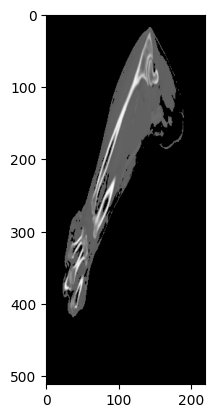

In [101]:
# TODO: YOUR CODE TO SEGMENT BONES
new_m = ct_numpy[120].copy().astype(np.int16)
new_m[new_m < 1000] = 0
plt.imshow(new_m, cmap='gray')
plt.show()

In [102]:
# Are the segmentations good?

In [103]:
# TODO: YOUR ANSWER
# no the segmentations are not good based on the Hounsfield Units for
#  Fat , Soft Tissue and Bones.

In [104]:
# references
# https://towardsdatascience.com/a-matter-of-grayscale-understanding-dicom-windows-1b44344d92bd

In [105]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""